<a href="https://colab.research.google.com/github/RaianaSeixas/Portifolio/blob/main/Machine-Learning_sklearn/Breast_cancer_Randon_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**BREAST CANCER DATASET DESCRIPTION**

In the breast cancer dataset, each datapoint has measurements from an image of a breast mass and whether or not it’s cancerous. The goal will be to use these measurements to predict if the mass is cancerous.  There are 30 features, 569 datapoints, and target is either Malignant ( 0 for the model) or Benign (1 for the model). For each of the datapoints we have measurements of the breast mass (radius, texture, perimeter, etc.). For each of the 10 measurements, multiple values were computed, so we have the mean, standard error and the worst value. This results in 10 * 3 or 30 total features. 

We will use **Randon Forest from sklearn** to create a prediction model.

In [4]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

cancer_data = load_breast_cancer() #load dataset

# Create dataframe and split features from taret
df = pd.DataFrame(cancer_data['data'], columns=cancer_data['feature_names'])
df['target'] = cancer_data['target']
X = df[cancer_data.feature_names].values
y = df['target'].values

#split data in train and test
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, random_state=101) 

rf = RandomForestClassifier(n_estimators=10, random_state=111) # create model
rf.fit(X_train, y_train) # training model

y_pred = rf.predict(X_test) #prediction step


print('**********  Model Evaluation  ***********')
print()
print(" Accuracy: {0:.5f}".format(accuracy_score(y_test, y_pred)))
print("Precision: {0:.5f}".format(precision_score(y_test, y_pred)))
print("   Recall: {0:.5f}".format(recall_score(y_test, y_pred)))
print(" f1 score: {0:.5f}".format(f1_score(y_test, y_pred)))
print()

# Mesure of features importance
print('*********** 10 most important features with their effects  ***********')
print()
ft_imp = pd.Series(rf.feature_importances_, index=cancer_data.feature_names).sort_values(ascending=False) # getting feature importance
df=pd.DataFrame(ft_imp.head(10))
df.columns=['Effect'] # rename column
df

**********  Model Evaluation  ***********

 Accuracy: 0.96503
Precision: 0.97701
   Recall: 0.96591
 f1 score: 0.97143

*********** 10 most important features with their effects  ***********



,Effect
worst radius,0.309701
mean concave points,0.183126
worst concave points,0.115641
mean perimeter,0.064119
mean radius,0.058742
worst concavity,0.050951
radius error,0.049103
mean texture,0.017197
worst area,0.016512
mean concavity,0.014696


Text(0.5, 0, 'Effect')

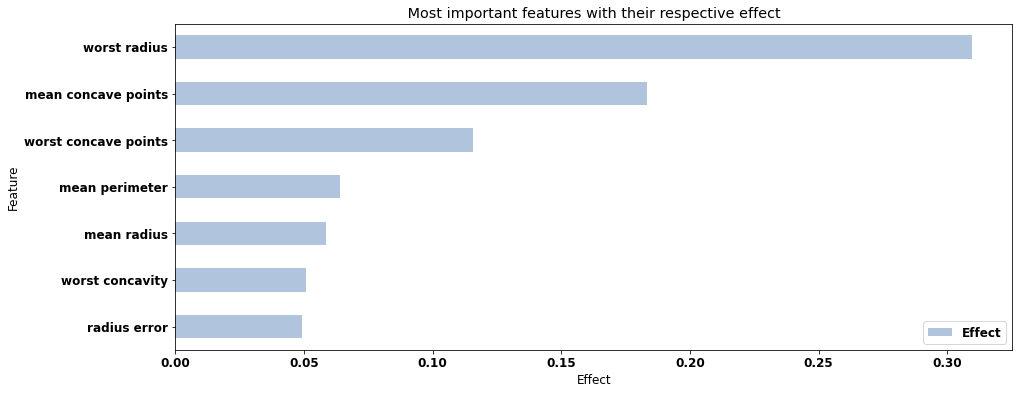

In [5]:
# #-------Vizualization-----------

# Let's print a chart containing the features whose effect is at least around 5%

df1=df.head(7).sort_values(by=['Effect'], ascending=True) # sort in ascending order for plot

font = {'weight' : 'bold',
        'size'   : 12}

plt.rc('font', **font)
plt.rcParams['figure.figsize'] = [15, 6] 

df1.plot(kind='barh', color='lightsteelblue')
plt.title(' Most important features with their respective effect ')
plt.ylabel('Feature')
plt.xlabel('Effect')

